In [0]:
# GPU로 바꾸기

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
### code part1 - word2vec 모델 저장하기

#Word2Vec embedding
import re
import nltk
from gensim.models import Word2Vec
import os
import numpy as np
import json
from nltk.tokenize import word_tokenize
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from keras.utils import np_utils


# token list 읽기 - train data 준비
from keras_preprocessing.text import Tokenizer

result = []
train_data = []
with open('/content/drive/My Drive/dataset/token_list/tempe_3000_tokens.txt', 'rt', encoding='UTF-8') as mf:
  while True:
    temp = mf.readline()
    if not temp:
      break
    if temp == '[\n':
      continue
    elif temp == ']\n':
      train_data.append(result)
      result = []
      continue
    else:
      l = len(temp)
      word = temp[0:l-1]
      result.append(word)

# test data 준비
result1 = []
test_data = []
with open('/content/drive/My Drive/dataset/token_list/vegas_3000_tokens.txt', 'rt', encoding='UTF-8') as mf:
  while True:
    temp1 = mf.readline()
    if not temp1:
      break
    if temp1 == '[\n':
      continue
    elif temp1 == ']\n':
      test_data.append(result1)
      result1 = []
      continue
    else:
      l = len(temp1)
      word1 = temp1[0:l-1]
      result1.append(word1)

# label 준비
train_label = []
with open('/content/drive/My Drive/dataset/전처리 전 json/tempe_3000.json', 'rt', -1, encoding='UTF-8') as f:
    for line in f:
        lineobj = json.loads(line)
        star = lineobj['stars']
        if star >= 4:
            train_label.append('2')
        elif star == 3:
            train_label.append('1')
        else:
            train_label.append('0')
            
train_label = np.array(train_label)
train_label = np_utils.to_categorical(train_label, 3)

# test label 준비
test_label=[]
with open('/content/drive/My Drive/dataset/전처리 전 json/vegas_3000.json', 'rt', -1, encoding='UTF-8') as f:
    for line in f:
        lineobj = json.loads(line)
        star = lineobj['stars']
        if star >= 4:
            test_label.append('2')
        elif star == 3:
            test_label.append('1')
        else:
            test_label.append('0')
            
test_label = np.array(test_label)     
test_label = np_utils.to_categorical(test_label, 3)


"""
max_length = max(len(train_data))
print(max_length)
""" 

"""
size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.
window = 컨텍스트 윈도우 크기
min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
workers = 학습을 위한 프로세스 수
sg = 0은 CBOW, 1은 Skip-gram.
"""

embedding_dim = 100
#train word2vec model
embedding_model = Word2Vec(sentences=train_data, size=embedding_dim, min_count=5, window=4, iter=200, workers=4, sg=0) #size = embedding_dim = 80

# save model
filename = '/content/drive/My Drive/temp_상아/word2vecmodel/word2vec_model.txt'
embedding_model.wv.save_word2vec_format(filename, binary=False)

#vocab size
words = list(embedding_model.wv.vocab)
print("Vocabulary size: %d" % len(words))
print(words)

a=embedding_model.wv.most_similar("delicious", topn=300)
print(a)





/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


Vocabulary size: 3037
['absolutely', 'love', 'place', 'many', 'time', 'never', 'fail', 'impress', 'bff', 'burger', 'tsoynamis', 'cupcake', 'amaze', 'everything', 'pretty', 'much', 'best', 'delicious', 'wish', 'closer', 'house', 'complaint', 'price', 'point', 'reasonable', 'menu', 'selection', 'great', 'could', 'not', 'ask', 'anything', 'else', 'wow', 'grow', 'meat', 'live', 'texas', 'taste', 'texture', 'become', 'vegetarian', 'always', 'crave', 'so', 'bring', 'green', 'wac', 'outstanding', 'ca', 'believe', 'perfect', 'right', 'color', 'consistency', 'garden', 'cook', 'idea', 'try', 'shock', 'opt', 'remove', 'middle', 'bun', 'like', 'double', 'patty', 'cheese', 'topping', 'would', 'guess', 'vegan', 'must', 'fry', 'crispy', 'fresh', 'also', 'samosa', 'better', 'fav', 'indian', 'restaurant', 'triple', 'chocolate', 'tsoynami', 'along', 'tempe', 'several', 'hub', 'work', 'meeting', 'trip', 'really', 'glad', 'discover', 'funny', 'every', 'see', 'friend', 'mention', 'big', 'similar', 'version

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [69]:
###code part2 - 모델 사용하기
import os
#test - train_data에 있는 중복되지 않은 모든 단어의 개수 : 10636 => 왜 word2vec 단어 개수와 다른지?
all_words = []
for sent in train_data:
  for word in sent:
    all_words.append(word)
#print(all_words)
unique_words = set(all_words)
print(len(unique_words)) 


# use pre-trained Embedding
#import os
embeddings_index = {}
file = open(os.path.join('', '/content/drive/My Drive/temp_상아/word2vecmodel/word2vec_model.txt'), encoding="utf-8")
for line in file:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:])
  embeddings_index[word] = coefs
file.close()

# max_length - train data
max_length = max([len(sent) for sent in train_data])
print('max_length of review(train) : ', max_length)

# max_length - test data
max_length_test = max([len(sent) for sent in test_data])
print('max_length of review(test) : ', max_length_test)

# vec - train data
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(train_data)
sequences = tokenizer_obj.texts_to_sequences(train_data)

# vec - test data
tokenizer_obj_test = Tokenizer()
tokenizer_obj_test.fit_on_texts(test_data)
sequences_test = tokenizer_obj_test.texts_to_sequences(test_data)

# pad_sequences
word_index = tokenizer_obj.word_index
print('Found %s unique tokens.' % len(word_index))

review_pad = pad_sequences(sequences, maxlen=max_length_test, padding = 'post')         # test data max가 더 커서 그 값으로 train, test 둘다 패딩
sentiment = train_label

print('Shape of review tensor:', review_pad.shape)
print('Shape of sentiment tensor:', sentiment.shape)

num_words = len(word_index)+1
embedding_dim = 100
embedding_matrix = np.zeros((num_words, embedding_dim))

for word, i in word_index.items():
  if i > num_words:
    continue
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None :
    # words not found in embedding index will be all-zeros
    embedding_matrix[i] = embedding_vector

print('train data word size : ',num_words)

# pad_sequences_test
word_index_test = tokenizer_obj_test.word_index
print('Found %s unique tokens(test).' % len(word_index_test))

review_pad_test = pad_sequences(sequences_test, maxlen=max_length_test, padding = 'post')   # test data max가 더 커서 그 값으로 train, test 둘다 패딩
sentiment_test = train_label

print('Shape of review tensor(test):', review_pad_test.shape)
print('Shape of sentiment tensor(test):', sentiment_test.shape)

num_words_test = len(word_index_test)+1
embedding_matrix_test = np.zeros((num_words_test, embedding_dim))

for word, i in word_index_test.items():
  if i > num_words_test:
    continue
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None :
    # words not found in embedding index will be all-zeros
    embedding_matrix_test[i] = embedding_vector

print('test data word size : ',num_words_test)

10636
max_length of review(train) :  454
max_length of review(test) :  501
Found 10636 unique tokens.
Shape of review tensor: (3000, 501)
Shape of sentiment tensor: (3000, 3)
train data word size :  10637
Found 11473 unique tokens(test).
Shape of review tensor(test): (3000, 501)
Shape of sentiment tensor(test): (3000, 3)
test data word size :  11474


In [70]:
### code part3 - 훈련 모델

from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU
from keras.layers import Dense, Activation, Flatten, Dropout, Conv1D, MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.initializers import Constant

#model.reset_states()
# define model
# In the below code, the only change from previous model is using the embedding_matrix as input to the Embedding layer and setting trainable = False, since the embedding is already learned.

model = Sequential()
model.add(Embedding(num_words, embedding_dim, embeddings_initializer=Constant(embedding_matrix), input_length=max_length_test, trainable = False))    #test data max length로 맞춤
#model.add(GRU(units=32, dropout=0.2, recurrent_dropout=0.2))
#model.add(Dense(3, activation='sigmoid'))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

# try using different optimizers and different optimizer configs
#sgd = SGD(lr=0.01, nesterov=True, decay=1e-6, momentum=0.9)
#model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 501, 100)          1063700   
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 497, 128)          64128     
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 248, 128)          0         
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 244, 128)          82048     
_________________________________________________________________
max_pooling1d_17 (MaxPooling (None, 122, 128)          0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 118, 128)          82048     
_________________________________________________________________
max_pooling1d_18 (MaxPooling (None, 59, 128)           0         
__________

In [71]:
# padding이 리뷰 앞에 되어있음....괜찮은건가.....
print(review_pad_test)
print(len(review_pad_test[100]))
print(review_pad_test[0])

[[  80   93 1857 ...    0    0    0]
 [  17   56   31 ...    0    0    0]
 [ 106  124  125 ...    0    0    0]
 ...
 [   9   67   16 ...    0    0    0]
 [  48  779  515 ...    0    0    0]
 [   5    3  687 ...    0    0    0]]
501
[  80   93 1857 3142  119 1391  916  135 5941   66    4 2832 1154 2832
  258  334  146   10    9  529   36  222 1128   38  200   94   82   53
  427    4  204  159   65  109  252   65 5942  268   53  732   45  315
 1264 3143 4461 2210   13   15  100   65    2    9 1858  428  654  196
   66  451  171  284  143  223  211 2211  284  846  358  211  172  211
 2384 2076   25 2385 2591  902   25  144    1   54   18 2591   25  144
   54 2592  902   25  144 5943  153   98 2211  284  846   75  749   86
 1002 1344  171  143  329  368  132  164  388    8   22   45  138   22
  256   22  138  756   86  606  818    7    5   47   75    1   72    7
   40 5944   15    7  148  470    1    9    1  835 1187    1   98  258
  320    2    2   35   62   69  917  380   12    7  200   

In [0]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 501, 100)          1063700   
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 497, 128)          64128     
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 248, 128)          0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 244, 128)          82048     
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, 122, 128)          0         
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 118, 128)          82048     
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 59, 128)           0         
__________

In [72]:
validation_split = 0.2

idx = np.arange(review_pad.shape[0])
np.random.shuffle(idx)
review_pad = review_pad[idx]
sentiment = sentiment[idx]
num_validation_samples = int(validation_split * review_pad.shape[0])

x_train_pad = review_pad[:-num_validation_samples]
y_train = sentiment[:-num_validation_samples]
x_valid_pad = review_pad[-num_validation_samples:]
y_valid = sentiment[-num_validation_samples:]

x_test_pad = review_pad_test
y_test = sentiment_test

print('Shape of x_train_pad tensor:', x_train_pad.shape)
print('Shape of y_train tensor:', y_train.shape)

print('Shape of x_valid_pad tensor:', x_valid_pad.shape)
print('Shape of y_valid tensor:', y_valid.shape)

print('Shape of x_test_pad tensor:', x_test_pad.shape)
print('Shape of y_test tensor:', y_test.shape)

Shape of x_train_pad tensor: (2400, 501)
Shape of y_train tensor: (2400, 3)
Shape of x_valid_pad tensor: (600, 501)
Shape of y_valid tensor: (600, 3)
Shape of x_test_pad tensor: (3000, 501)
Shape of y_test tensor: (3000, 3)


In [73]:
result = model.fit(x_train_pad, y_train, batch_size=128, epochs=20, validation_data=(x_valid_pad, y_valid), verbose=1)

Train on 2400 samples, validate on 600 samples
Epoch 1/20
2400/2400 [==============================] - 2s 838us/step - loss: 0.6197 - acc: 0.6789 - val_loss: 0.4773 - val_acc: 0.7611
Epoch 2/20
2400/2400 [==============================] - 1s 360us/step - loss: 0.4344 - acc: 0.7690 - val_loss: 0.4058 - val_acc: 0.7872
Epoch 3/20
2400/2400 [==============================] - 1s 361us/step - loss: 0.3849 - acc: 0.7939 - val_loss: 0.4059 - val_acc: 0.7817
Epoch 4/20
2400/2400 [==============================] - 1s 356us/step - loss: 0.3562 - acc: 0.8218 - val_loss: 0.4270 - val_acc: 0.7800
Epoch 5/20
2400/2400 [==============================] - 1s 358us/step - loss: 0.3235 - acc: 0.8439 - val_loss: 0.3736 - val_acc: 0.8156
Epoch 6/20
2400/2400 [==============================] - 1s 363us/step - loss: 0.2806 - acc: 0.8693 - val_loss: 0.4253 - val_acc: 0.8100
Epoch 7/20
2400/2400 [==============================] - 1s 361us/step - loss: 0.2210 - acc: 0.9018 - val_loss: 0.4273 - val_acc: 0.8128
E

In [0]:
# 참고 - https://towardsdatascience.com/machine-learning-word-embedding-sentiment-classification-using-keras-b83c28087456

In [0]:
# save model
model.save('/content/drive/My Drive/temp_상아/kerasmodel/keras_model.h5')
print('save model...')

save model...


3000/3000 [==============================] - 1s 245us/step
Accuracy: 56.177779


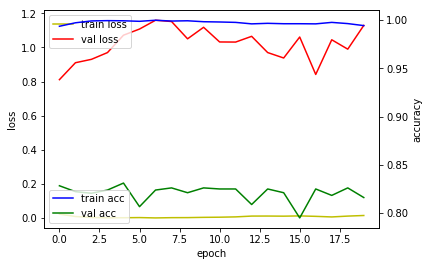

In [0]:
#loss, accuracy = model.evaluate(padded_sentences_test, test_label, verbose=1)
loss, accuracy = model.evaluate(x_test_pad, y_test, verbose=1)
print('Accuracy: %f' % (accuracy*100))

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(result.history['loss'], 'y', label='train loss')
loss_ax.plot(result.history['val_loss'], 'r', label='val loss')
#loss_ax.set_ylim([-0.2, 1.2])

acc_ax.plot(result.history['acc'], 'b', label='train acc')
acc_ax.plot(result.history['val_acc'], 'g', label='val acc')
#acc_ax.set_ylim([-0.2, 1.2])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()


3000/3000 [==============================] - 1s 259us/step
Accuracy: 56.688891


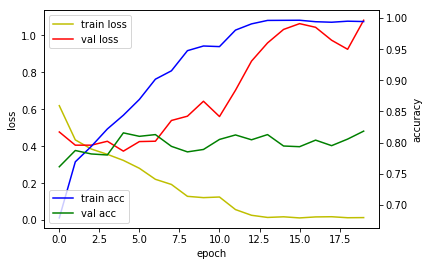

In [74]:
#loss, accuracy = model.evaluate(padded_sentences_test, test_label, verbose=1)
loss, accuracy = model.evaluate(x_test_pad, y_test, verbose=1)
print('Accuracy: %f' % (accuracy*100))

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(result.history['loss'], 'y', label='train loss')
loss_ax.plot(result.history['val_loss'], 'r', label='val loss')
#loss_ax.set_ylim([-0.2, 1.2])

acc_ax.plot(result.history['acc'], 'b', label='train acc')
acc_ax.plot(result.history['val_acc'], 'g', label='val acc')
#acc_ax.set_ylim([-0.2, 1.2])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()


In [0]:

# keras model remove 맨 위에 추가해야 함.
# 단어 임베딩 제대로 된건지 확인하기. 왜 review_pad가 벡터로 임베딩되지 않고 정수로 임베딩됐는지 / 워드벡터가 어디에 쓰였는지/ 같은 수는 word2vec의 유사어인지 확인